In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV



In [15]:
# Load the dataset
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [16]:
print("Data Overview:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None

Summary Statistics:
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
m

In [17]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [18]:
data.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

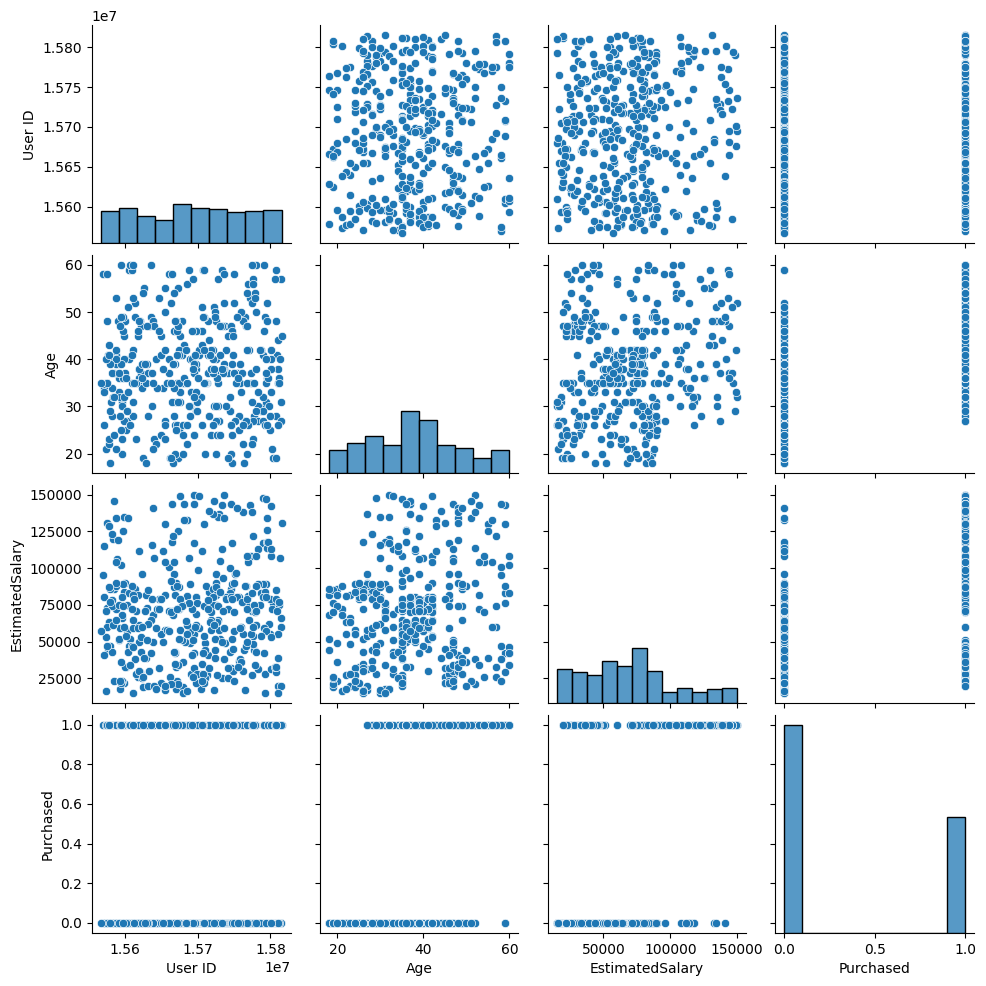

In [19]:
# Plotting distributions
sns.pairplot(data)
plt.show()

In [20]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

<ipython-input-20-29a6349016b9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='viridis')


Grouped Analysis by Gender:
              User ID        Age  EstimatedSalary  Purchased
Gender                                                     
Female  1.569331e+07  38.411765     71759.803922   0.377451
Male    1.568970e+07  36.867347     67642.857143   0.336735


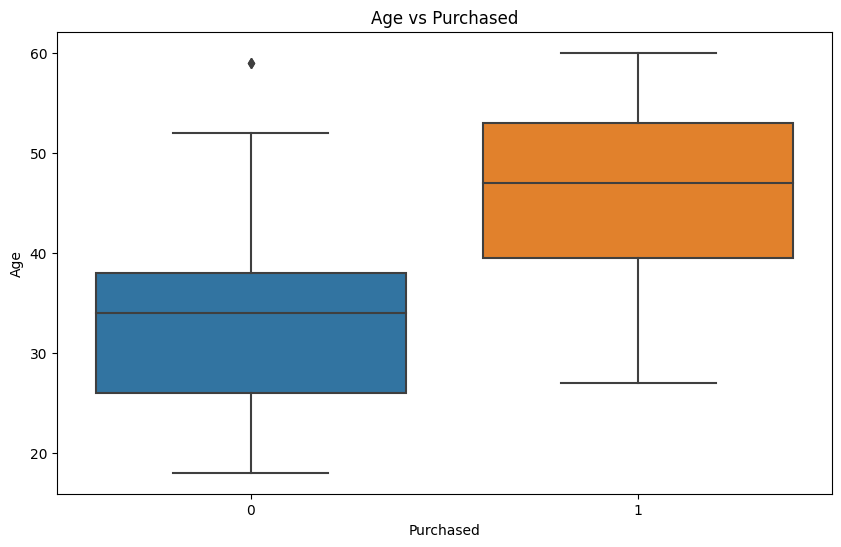

In [21]:
# Grouped Analysis by Gender
gender_grouped = data.groupby('Gender').mean()
print("Grouped Analysis by Gender:\n", gender_grouped)

# Bivariate Analysis - Age vs Purchased
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchased', y='Age', data=data)
plt.title('Age vs Purchased')
plt.show()

In [22]:
# Age Group Segmentation
data['Age Group'] = pd.cut(data['Age'], bins=[0, 20, 30, 40, 50, 60, 70], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70'])
age_grouped = data.groupby('Age Group').mean()
print("Purchasing Behavior across Age Groups:\n", age_grouped)

Purchasing Behavior across Age Groups:
                 User ID        Age  EstimatedSalary  Purchased
Age Group                                                     
0-20       1.569743e+07  19.105263     57157.894737   0.000000
21-30      1.570145e+07  26.315217     62206.521739   0.065217
31-40      1.568132e+07  35.922535     72760.563380   0.232394
41-50      1.569260e+07  45.224490     68948.979592   0.602041
51-60      1.569812e+07  56.020408     81612.244898   0.918367
61-70               NaN        NaN              NaN        NaN


<ipython-input-22-3760ce8a10f2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_grouped = data.groupby('Age Group').mean()


In [23]:
# Salary Bins Analysis
data['Salary Group'] = pd.cut(data['EstimatedSalary'], bins=[0, 50000, 100000, 150000], labels=['0-50k', '50k-100k', '100k-150k'])
salary_grouped = data.groupby('Salary Group').mean()
print("Purchasing Behavior across Salary Groups:\n", salary_grouped)

Purchasing Behavior across Salary Groups:
                    User ID        Age  EstimatedSalary  Purchased
Salary Group                                                     
0-50k         1.568807e+07  37.846774     32370.967742   0.354839
50k-100k      1.569017e+07  35.640394     72463.054187   0.182266
100k-150k     1.570123e+07  42.931507    125657.534247   0.849315


<ipython-input-23-ac559473cb1c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  salary_grouped = data.groupby('Salary Group').mean()


In [24]:
# Interaction Between Age and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=data)
plt.title('Interaction Between Age and Estimated Salary')
plt.show()

In [25]:
# Advanced Visualization - Pair Plot
sns.pairplot(data, hue='Purchased')
plt.show()

In [26]:
# Outlier Detection using Z-score
z_scores = zscore(data.select_dtypes(include=[np.number]))
outliers = np.where(np.abs(z_scores) > 3)
print("Indices of Outliers:", outliers)

Indices of Outliers: (array([], dtype=int64), array([], dtype=int64))


#Preprocessing



In [27]:
# Encoding the 'Gender' column
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [28]:
X = data.drop(['User ID', 'Purchased', 'Age Group', 'Salary Group'], axis=1)
y = data['Purchased']


In [29]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Logistic regression



In [31]:
# Building the Logistic Regression Model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [32]:
# Evaluating Logistic Regression Model
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Display the results
print("Logistic Regression Model:")
print("Confusion Matrix:\n", conf_matrix_logistic)
print("\nClassification Report:\n", class_report_logistic)

# print("\nRandom Forest Classifier Model:")
# print("Confusion Matrix:\n", conf_matrix_rf)
# print("\nClassification Report:\n", class_report_rf)

Logistic Regression Model:
Confusion Matrix:
 [[52  0]
 [28  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



#Random forest classifier

#Grid search

In [34]:
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameters grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}



In [35]:
# Grid search
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
CV_rf.fit(X_train, y_train)

# Best parameters
print("Best Parameters found by Grid Search:", CV_rf.best_params_)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters found by Grid Search: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [36]:
# Evaluate the best model
best_rf = CV_rf.best_estimator_
predictions = best_rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



# KNN

In [37]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print("KNN Classification Report:")
print(classification_report(y_test, knn_model.predict(X_test)))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        52
           1       0.77      0.71      0.74        28

    accuracy                           0.82        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.82      0.82      0.82        80



#SVM

In [38]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
print("SVM Classification Report:")
print(classification_report(y_test, svm_model.predict(X_test)))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        52
           1       0.77      0.36      0.49        28

    accuracy                           0.74        80
   macro avg       0.75      0.65      0.66        80
weighted avg       0.74      0.74      0.71        80



#Decision Tree

In [39]:
# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
print("Decision Tree Classifier Classification Report:")
print(classification_report(y_test, decision_tree_model.predict(X_test)))

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        52
           1       0.81      0.75      0.78        28

    accuracy                           0.85        80
   macro avg       0.84      0.83      0.83        80
weighted avg       0.85      0.85      0.85        80



#K-Fold Cross-Validation

In [40]:
scores = cross_val_score(logistic_model, X, y, cv=5)
print("Cross-Validation Scores for Logistic Regression:", scores)

Cross-Validation Scores for Logistic Regression: [0.65   0.65   0.6375 0.8125 0.625 ]


#Performance of all the classification methods

In [41]:
# Initialize models
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier()
svm_model = SVC()
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)

In [42]:
# Dictionary of models
models = {
    'Logistic Regression': logistic_model,
    'K-Nearest Neighbors': knn_model,
    'Support Vector Machine': svm_model,
    'Random Forest': random_forest_model,
    'Decision Tree': decision_tree_model
}


In [43]:
# Train and evaluate each model
model_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# Displaying the results
for model_name, metrics in model_results.items():
    print(f"{model_name}:\n Accuracy: {metrics['Accuracy']:.2f}, Precision: {metrics['Precision']:.2f}, Recall: {metrics['Recall']:.2f}, F1-Score: {metrics['F1-Score']:.2f}\n")

Logistic Regression:
 Accuracy: 0.65, Precision: 0.42, Recall: 0.65, F1-Score: 0.51

K-Nearest Neighbors:
 Accuracy: 0.82, Precision: 0.82, Recall: 0.82, F1-Score: 0.82

Support Vector Machine:
 Accuracy: 0.74, Precision: 0.74, Recall: 0.74, F1-Score: 0.71

Random Forest:
 Accuracy: 0.90, Precision: 0.90, Recall: 0.90, F1-Score: 0.90

Decision Tree:
 Accuracy: 0.85, Precision: 0.85, Recall: 0.85, F1-Score: 0.85



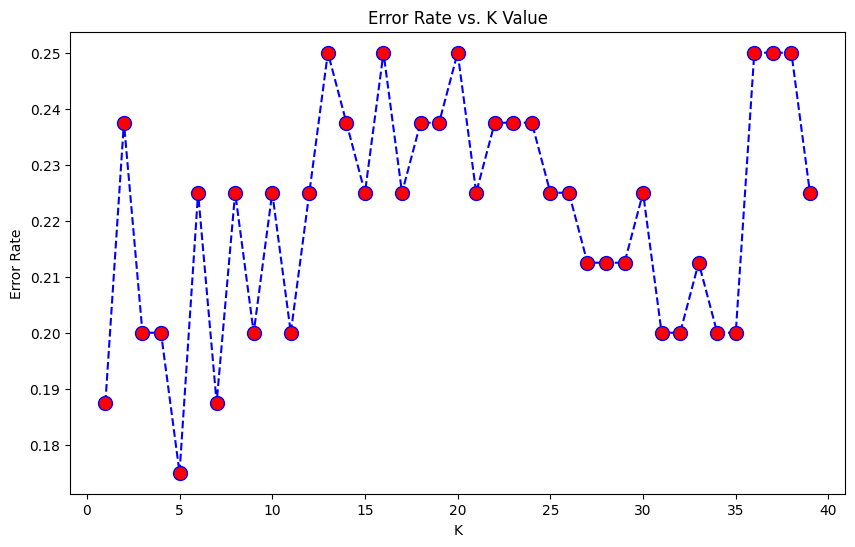

In [45]:
error_rates = []
for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = np.mean(pred_k != y_test)
    error_rates.append(error)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rates, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [48]:
# Model Performance Metrics
predictions = best_rf.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80

Confusion Matrix:
 [[52  0]
 [28  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted

Feature Importances:
                  importance
Age                0.515417
EstimatedSalary    0.476734
Gender             0.007849


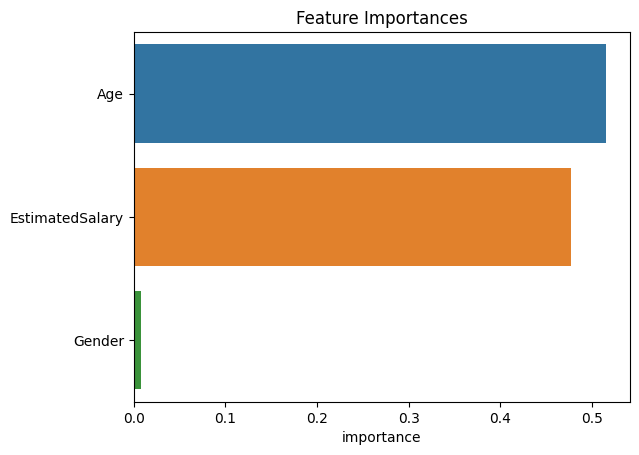

In [47]:
# Feature Importance
feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:\n", feature_importances)

# Visualize Feature Importance
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importances')
plt.show()